In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from deepface import DeepFace

dict_keys(['original', '10_3_0', '10_6_0', '10_9_0', '20_3_0', '20_6_0', '20_9_0', '20_12_0', '20_16_0', '40_3_0', '40_6_0', '40_9_0', '40_12_0', '40_16_0', '40_20_0', '40_25_0'])


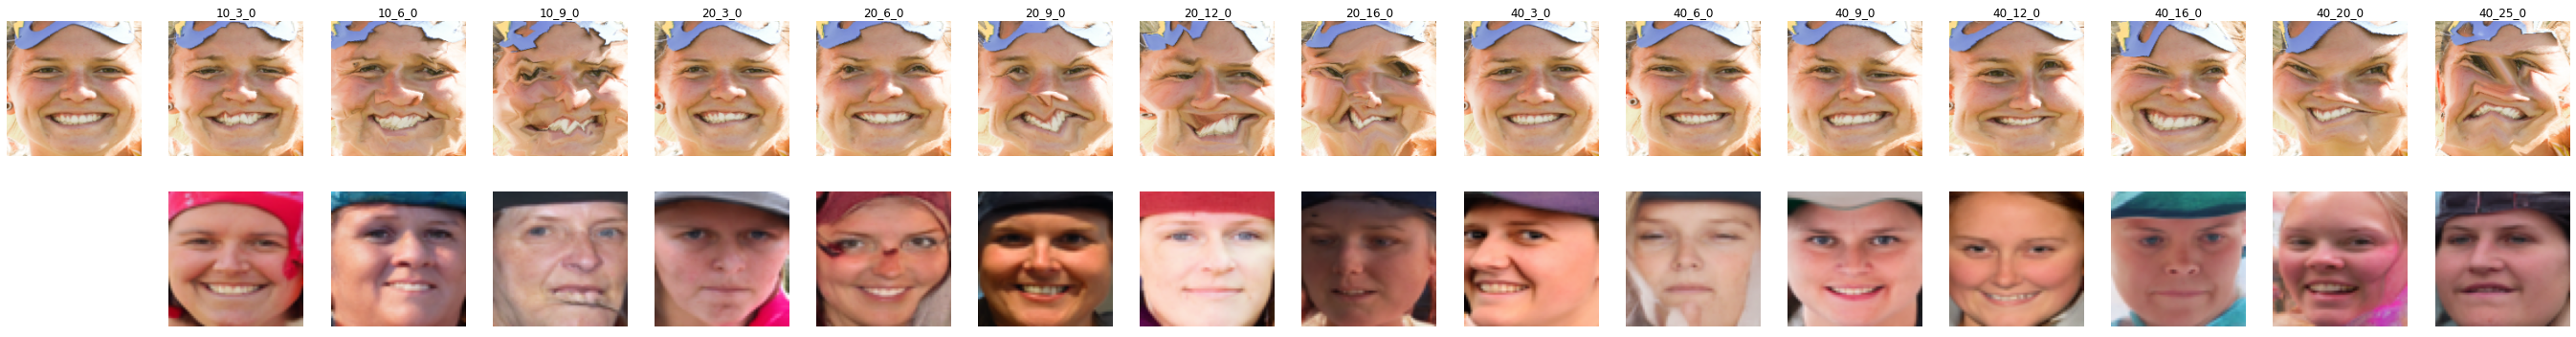

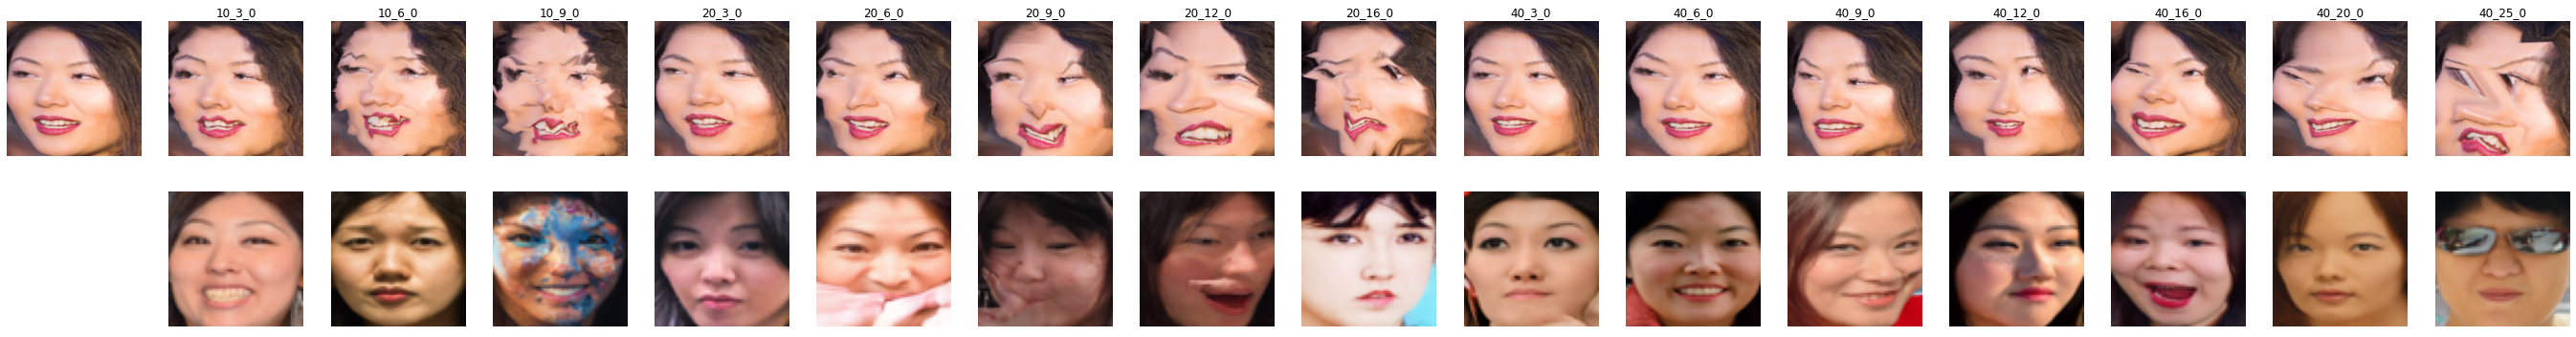

In [6]:
# types = ["0_0_3", "0_0_5", "0_0_7", "0_0_9"] #blur
types = ["10_3_0", "10_6_0", "10_9_0", "20_3_0", "20_6_0", "20_9_0", "20_12_0", "20_16_0","40_3_0", "40_6_0", "40_9_0", "40_12_0", "40_16_0", "40_20_0", "40_25_0"] #warp

modes = ["train", "test"]

train_sample = {}
test_sample = {}
train_reconstructed ={}
test_reconstructed = {}


# original image for reference: pick index=0 (or as used in for loop) image of train and test dataset
train_og = "ffhq256_pp/train/images/00197.png"
test_og = "ffhq256_pp/test/images/69000.png"

train_og_img = cv2.imread(train_og)
test_og_img = cv2.imread(test_og)
train_og_img = cv2.cvtColor(train_og_img, cv2.COLOR_BGR2RGB)
test_og_img = cv2.cvtColor(test_og_img, cv2.COLOR_BGR2RGB)

train_sample['original'] = train_og_img
test_sample['original'] = test_og_img


for mode in modes:
    for type in types:
        # 500 image samples generated from ddpm
        model_output = np.load('ffhq_warped_results/{}/{}/samples_500x64x64x3.npz'.format(type, mode))

        warped_images = model_output['arr_2']
        reconstructed_images = model_output['arr_0']

        warped_image_data = "ffhq_warped/{}/{}/images/".format(type, mode)
        original_image_data = "ffhq256_pp/{}/images/".format(mode)
        warped_image_files = os.listdir(warped_image_data)
        warped_image_files.sort()

        if mode == "train":
            train_sample[type] = warped_images[0]
            train_reconstructed[type] = reconstructed_images[0]
        else:
            test_sample[type] = warped_images[0]
            test_reconstructed[type] = reconstructed_images[0]
        

n = len(types)

# show train images
fig, ax = plt.subplots(2, n+1)
fig.set_size_inches(3*(n+1), 2*3)
ax[0, 0].imshow(train_sample['original'])
ax[0,0].axis('off')
ax[1,0].axis('off')

for i, type in enumerate(types):
    ax[0, i+1].imshow(train_sample[type])
    ax[1, i+1].imshow(train_reconstructed[type])
    ax[0, i+1].set_title(type)
    ax[0, i+1].axis('off')
    ax[1, i+1].axis('off')

plt.show()

# show test images
fig, ax = plt.subplots(2, n+1)
fig.set_size_inches(3*(n+1), 2*3)
ax[0, 0].imshow(test_sample['original'])
ax[0,0].axis('off')
ax[1,0].axis('off')

for i, type in enumerate(types):
    ax[0, i+1].imshow(test_sample[type])
    ax[1, i+1].imshow(test_reconstructed[type])
    ax[0, i+1].set_title(type)
    ax[0, i+1].axis('off')
    ax[1, i+1].axis('off')
